In [1]:
import pandas as pd
import datetime

all_o3_df = pd.read_csv("./all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [6]:
#select date range to measure PM2.5 for full shutdown - include all years
#messy right now - turn into a function!

#use Jacksonville as an example
earliest_year = min(all_pm25_df.index.year)
latest_year = max(all_pm25_df.index.year)
shutdown_start_date = (2, 10)#"1/23"
shutdown_end_date = (4, 8)#"4/8"
mask = ((pd.Series(map(lambda x: x.month <= shutdown_start_date[0], all_pm25_df.index.date), index=all_pm25_df.index)) &
                                            ((pd.Series(map(lambda x: x.day < shutdown_start_date[1], all_pm25_df.index.date), index=all_pm25_df.index))))
#first get dates after the start date for all years
shutdown_time_period_pm_df = all_pm25_df.loc[~mask, :]

#remove the later months
shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df.index.month<=shutdown_end_date[0]]

#now get dates before the end date
mask2 = ((pd.Series(map(lambda x: x.month == shutdown_end_date[0], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index)) &
                                            ((pd.Series(map(lambda x: x.day >= shutdown_end_date[1], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index))))

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[~mask2, :]

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df["City"] == "Shanghai"]
print(shutdown_time_period_pm_df.head())
shutdown_time_period_pm_df.tail(10)

           Country      City Specie  count  min (ug/m3)  max (ug/m3)  \
Date                                                                   
2017-01-10      CN  Shanghai   pm25    216         55.5        103.9   
2017-01-11      CN  Shanghai   pm25    216          7.2         69.0   
2017-01-12      CN  Shanghai   pm25    210          2.1         94.2   
2017-01-13      CN  Shanghai   pm25    215         61.3        146.5   
2017-01-14      CN  Shanghai   pm25    216          2.1         92.2   

            median (ug/m3)  
Date                        
2017-01-10            80.6  
2017-01-11            30.1  
2017-01-12            52.1  
2017-01-13            96.1  
2017-01-14            17.8  


,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2020-03-29,CN,Shanghai,pm25,825,1.2,42.800000,8.1
2020-03-30,CN,Shanghai,pm25,879,3.1,31.100000,13.0
2020-03-31,CN,Shanghai,pm25,872,2.1,32.000000,15.9
2020-04-01,CN,Shanghai,pm25,879,1.2,990.964959,32.0
2020-04-02,CN,Shanghai,pm25,863,2.1,88.400000,16.8
2020-04-03,CN,Shanghai,pm25,877,12.0,57.400000,26.8
2020-04-04,CN,Shanghai,pm25,887,6.0,230.200000,50.1
2020-04-05,CN,Shanghai,pm25,884,1.2,31.100000,13.0
2020-04-06,CN,Shanghai,pm25,859,2.1,38.700000,14.9


In [8]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

test_df = shutdownData(all_pm25_df, "Shanghai", (2, 10), (4, 8))

print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

The 'shutdownData' function is working correctly: True


In [9]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
wuhan_o3_shutdown_df = shutdownData(all_o3_df, "Shanghai", (2, 10), (4, 8))
wuhan_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-10,CN,Shanghai,o3,215,1.0,39.0,25.0
2017-01-11,CN,Shanghai,o3,216,10.0,37.0,29.0
2017-01-12,CN,Shanghai,o3,204,1.0,34.0,8.0
2017-01-13,CN,Shanghai,o3,188,1.0,38.0,18.0
2017-01-14,CN,Shanghai,o3,216,15.0,39.0,30.0
...,...,...,...,...,...,...,...
2020-04-03,CN,Shanghai,o3,881,1.0,58.0,37.0
2020-04-04,CN,Shanghai,o3,876,0.0,66.0,36.0
2020-04-05,CN,Shanghai,o3,888,20.0,57.0,39.0


In [10]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,211.594937,20.587342,88.591139,45.510127
2018,209.784810,18.140506,85.802532,43.675949
2019,841.696203,13.794937,156.008352,48.705063
2020,855.150000,8.242500,229.550620,34.687500


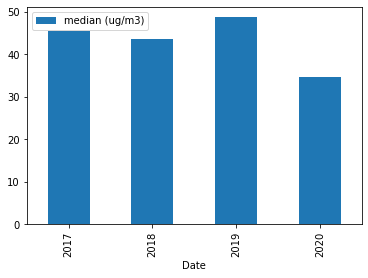

In [11]:
bar_plot_info.plot(kind="bar", y="median (ug/m3)")

In [12]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             421.025316
min (ug/m3)        17.507595
max (ug/m3)       110.134008
median (ug/m3)     45.963713
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,-0.245329


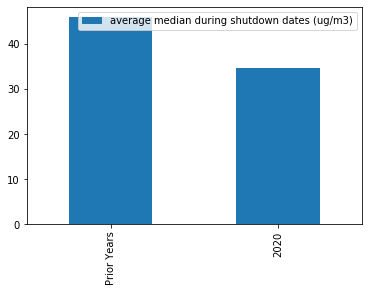

In [13]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar")
summary_bar_plot.pct_change()